In [38]:
import os

#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scipy.io import loadmat
from torch.utils.data import DataLoader, TensorDataset, random_split
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning import seed_everything
from pathlib import Path
import h5py

torch.manual_seed(1234)

np.random.seed(1234)

#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))

cuda
NVIDIA RTX A6000


In [39]:
class config:
  def __init__(self):

    self.dataset_path = 'C:/Users/idris_oduola/Documents/Projects/RqPINN/dataset/CahnHilliard_solution.mat'
    #self.model_path = 'C:/Users/idris_oduola/Documents/Projects/RqPINN/dataset/deeponet_burgers_model.pt'
    #self.checkpoint_dir = 'C:/Users/idris_oduola/Documents/Projects/RqPINN/dataset/checkpoint_burgers_deeponet'


cfg = config()

In [40]:
with h5py.File('C:/Users/idris_oduola/Documents/Projects/RqPINN/dataset/CahnHilliard_solution.mat', 'r') as file:
    c_total = np.array(file['c_total']).transpose()  # transpose due to MATLAB-Python ordering

In [41]:
c_total.shape

(20, 100, 100, 101)

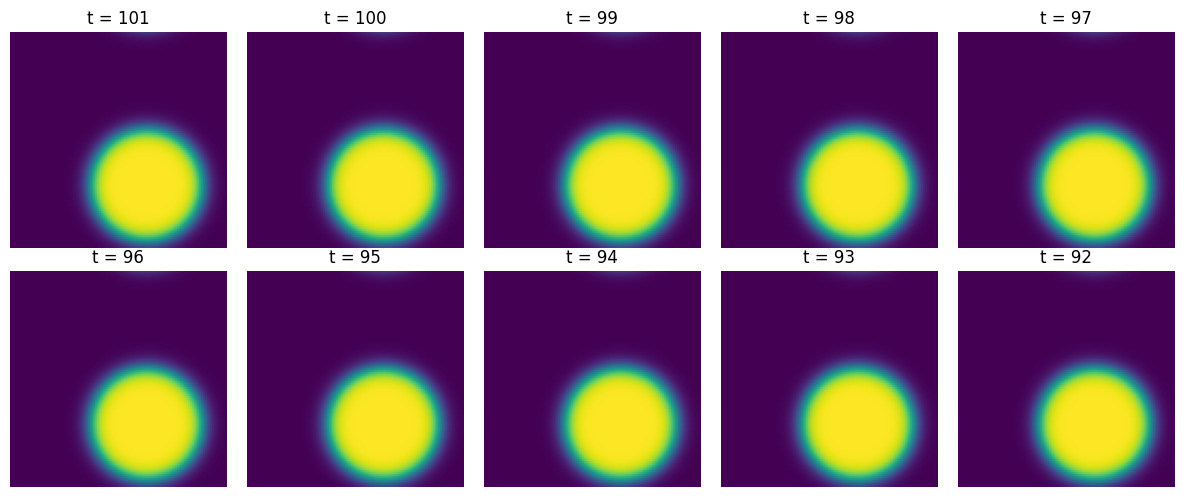

In [51]:
plt.figure(figsize = (12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    j = -(i+1)
    plt.title(f"t = {c_total.shape[-1] - i}")
    plt.imshow(c_total[2,:,:,j])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [52]:
c_total[0,:,:,1]

array([[-1.00261191, -1.00308712, -1.00345902, ..., -1.00059852,
        -1.00136362, -1.00203622],
       [-1.00298898, -1.00339131, -1.00370724, ..., -1.00130293,
        -1.00193988, -1.0025037 ],
       [-1.00334087, -1.0036788 , -1.00394508, ..., -1.00194093,
        -1.00246652, -1.00293515],
       ...,
       [-1.00142056, -1.00216294, -1.00273818, ..., -0.99816945,
        -0.99942672, -1.00050929],
       [-1.0018175 , -1.00246305, -1.00296496, ..., -0.9990223 ,
        -1.00009681, -1.00102863],
       [-1.0022182 , -1.00277457, -1.00320856, ..., -0.99983536,
        -1.00074607, -1.00154127]])